In [1]:
import sklearn
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

#그래프 출력 모듈
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Iris dataset

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

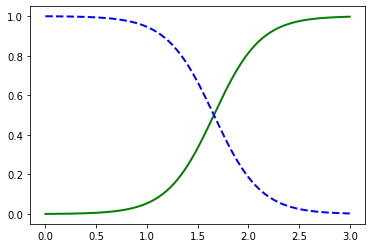

In [10]:
#로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

#그래프
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
#초록 선이 virginica

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def learning_schedule(t):
    return t0 / (t + t1)    

#기존 확률적 경사 하강법 슬라이드 6-2 14pg 수정
# iris data로 시행
#logistic regression
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0
X_b = np.c_[np.ones((150, 1)), X]
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = xi.T.dot(sigmoid(xi.dot(theta)) - yi)
    eta = learning_schedule(epoch * m + 1)
    theta = (theta - eta * gradients)
theta

array([[ 0.49891111],
       [-0.08741352]])

In [6]:
#모듈을 사용한 결과
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.coef_, sgd_reg.intercept_

(array([0.48821569]), array([-0.23073749]))

In [12]:
#소프트맥스 모듈 사용 결과

X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

softmax_reg.intercept_, softmax_reg.coef_

(array([ 18.87514796,   6.3844344 , -25.25958236]),
 array([[-4.58614563, -2.24129385],
        [ 0.16068263, -2.15860167],
        [ 4.425463  ,  4.39989552]]))

In [13]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
def learning_schedule(t):
    return t0 / (t + t1)    

#기존 확률적 경사 하강법 슬라이드 6-2 14pg 수정
# iris data로 시행
#softmax regression
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0
X_b = np.c_[np.ones((150, 1)), X]
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = np.sum(xi.T.dot(softmax(xi.dot(theta))-yi))
    eta = learning_schedule(epoch * m + 1)
    theta = (theta - eta * gradients)

In [14]:
theta

array([[ 0.31452048],
       [-0.32045797]])